In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

D:\Software Installations\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(y_train)

60000

In [5]:
len(X_test)

10000

In [6]:
len(y_test)

10000

In [7]:
X_train[0].shape

(28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

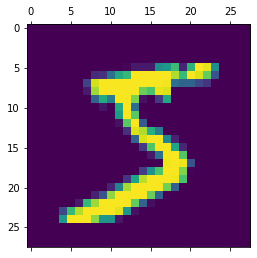

In [9]:
plt.matshow(X_train[0])

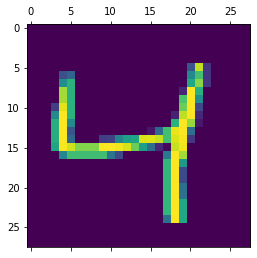

In [11]:
plt.matshow(X_train[2])

In [12]:
y_train[2]

4

In [14]:
X_train.shape

(60000, 28, 28)

In [28]:
X_train = X_train/255
X_test = X_test/255

In [29]:
X_train_flattened = X_train.reshape(len(X_train),28*28)

In [30]:
X_train_flattened.shape

(60000, 784)

In [31]:
X_test.shape

(10000, 28, 28)

In [32]:
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [33]:
X_test_flattened.shape

(10000, 784)

In [34]:
X_train_flattened[0].shape

(784,)

In [35]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(X_train_flattened,y_train,epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.4862 - acc: 0.8771
Epoch 2/5
60000/60000 [==============================] - 1s 24us/step - loss: 0.3065 - acc: 0.9154
Epoch 3/5
60000/60000 [==============================] - 2s 25us/step - loss: 0.2854 - acc: 0.9205
Epoch 4/5
60000/60000 [==============================] - 1s 25us/step - loss: 0.2751 - acc: 0.9238
Epoch 5/5
60000/60000 [==============================] - 2s 25us/step - loss: 0.2677 - acc: 0.9260


In [36]:
model.evaluate(X_test_flattened,y_test)

10000/10000 [==============================] - 0s 18us/step


[0.26631241951286794, 0.927]

In [37]:
y_pred = model.predict(X_test_flattened)
y_pred[0]

array([9.8576566e-06, 8.7566322e-11, 4.7114754e-05, 7.9924315e-03,
       9.0806572e-07, 6.3727210e-05, 1.2619301e-09, 7.6034349e-01,
       8.9743924e-05, 8.8733295e-04], dtype=float32)

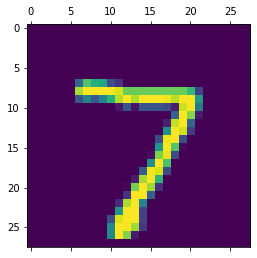

In [38]:
plt.matshow(X_test[0])

In [39]:
np.argmax(y_pred[0])

7

In [40]:
y_predicted_labels = [np.argmax(i) for i in y_pred]

In [41]:
y_predicted_labels[:6]

[7, 2, 1, 0, 4, 1]

In [43]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

AttributeError: module 'tensorflow.math' has no attribute 'confusion_matrix'

In [44]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('Truth')

NameError: name 'cm' is not defined

<Figure size 720x504 with 0 Axes>